In [1]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def create_usgs_url(site_no, begin_date, end_date):
    return (f'https://waterdata.usgs.gov/nwis/dv?'
        f'cb_00060=on&format=rdb&referred_module=sw&'
        f'site_no={site_no}&'
        f'begin_date={begin_date}&'
        f'end_date={end_date}')

def open_usgs_data(site, begin_date, end_date):
    url = create_usgs_url((site), begin_date, end_date)
    response = urllib.request.urlopen(url)
    df = pd.read_table(
        response, comment='#', skipfooter=1, sep='\s+',
        names=['agency', 'site', 'date', 'streamflow', 'quality_flag'],
        index_col=2, parse_dates=True).iloc[2:]
    df['streamflow'] = df['streamflow'].astype(np.float64)
    df.index = pd.DatetimeIndex(df.index)
    return df

def open_daymet_data(lat, lon, begin_date, end_date):
    args = {'lat':  lat, 'lon': lon, 'format': 'csv',
            'start': begin_date, 'end': end_date}
    query = urllib.parse.urlencode(args)
    url = f"https://daymet.ornl.gov/single-pixel/api/data?{query}"
    response = urllib.request.urlopen(url)
    df = pd.read_csv(response, header=6)
    datestring = (df['year'].astype(str) + df['yday'].astype(str))
    dates = pd.to_datetime(datestring, format='%Y%j')
    df.index = pd.DatetimeIndex(dates)
    return df

In [18]:
is_oct = verde_df.index.month == 10
october_df = verde_df[is_oct]

Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       ...
        9,  9,  9, 10, 10, 10, 10, 10, 10, 10],
      dtype='int32', name='date', length=13156)

In [4]:
site = '09506000'
begin_date = '1988-10-01'
end_date = '2024-10-14'

lat = 34.4483605
lon = -111.7898705
verde_df = open_daymet_data(lat, lon, begin_date, end_date)
usgs_df = open_usgs_data(site, begin_date, end_date)
verde_df = verde_df.reindex(usgs_df.index)
verde_df['streamflow'] = usgs_df['streamflow']
verde_df = verde_df[begin_date:end_date]
verde_df

/var/folders/7c/k9ztpxkn35s1mbm2kjthjwz80000gn/T/ipykernel_72516/785330650.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_table(
/var/folders/7c/k9ztpxkn35s1mbm2kjthjwz80000gn/T/ipykernel_72516/785330650.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_table(


,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
date,,,,,,,,,,
1988-10-01,1988.0,275.0,41677.29,0.0,430.52,0.0,35.10,10.43,1225.31,145.0
1988-10-02,1988.0,276.0,41546.01,0.0,410.22,0.0,35.38,12.11,1389.75,144.0
1988-10-03,1988.0,277.0,41415.04,0.0,416.20,0.0,35.23,11.17,1303.00,142.0
1988-10-04,1988.0,278.0,41284.38,0.0,389.39,0.0,34.33,12.45,1444.17,142.0
1988-10-05,1988.0,279.0,41154.08,0.0,345.73,0.0,32.68,14.26,1624.89,145.0
...,...,...,...,...,...,...,...,...,...,...
2024-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.8
2024-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.5
2024-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.8


In [21]:
verde_df.groupby(verde_df.index.dayofyear).mean()

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
date,,,,,,,,,,
1,2006.0,1.0,35066.71,0.875714,255.100286,0.0,14.845429,-1.577429,487.680286,532.861111
2,2006.0,2.0,35099.64,1.661714,249.176571,0.0,14.949429,-1.435429,500.267429,578.833333
3,2006.0,3.0,35135.27,2.402286,236.439143,0.0,14.439429,-1.148857,512.897714,400.888889
4,2006.0,4.0,35173.58,3.511429,239.850286,0.0,14.753714,-0.980857,526.811143,519.611111
5,2006.0,5.0,35214.55,2.660286,232.872000,0.0,14.895429,-0.242571,557.479714,455.472222
...,...,...,...,...,...,...,...,...,...,...
362,2005.5,362.0,34962.32,1.926667,244.129444,0.0,13.557500,-2.058889,466.143889,273.833333
363,2005.5,363.0,34984.23,2.810833,229.762778,0.0,13.790278,-0.993611,510.567778,293.000000
364,2005.5,364.0,35008.92,1.377500,243.605278,0.0,14.583056,-1.186389,506.981944,630.277778


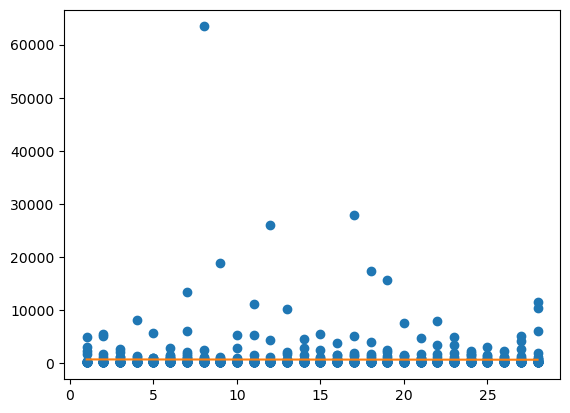

In [33]:
small_df = verde_df[verde_df['yday'] <= 28]
m, b  = np.polyfit(small_df['yday'], small_df['streamflow'], 1)

plt.plot(small_df['yday'], small_df['streamflow'], 'o')
plt.plot(small_df['yday'], m * small_df['yday'] + b)

In [41]:
wk1_mask = np.logical_and(verde_df['yday'] <= 294, verde_df['yday'] >= 287)
week_df = verde_df[wk1_mask]

,year,yday,dayl (s),prcp (mm/day),srad (W/m^2),swe (kg/m^2),tmax (deg c),tmin (deg c),vp (Pa),streamflow
date,,,,,,,,,,
1988-10-13,1988.0,287.0,40127.41,0.00,323.76,0.0,27.24,10.13,1238.20,153.0
1988-10-14,1988.0,288.0,40001.47,19.83,179.40,0.0,23.40,11.62,1367.00,214.0
1988-10-15,1988.0,289.0,39876.16,0.00,368.17,0.0,29.34,8.36,1098.94,185.0
1988-10-16,1988.0,290.0,39751.51,0.00,368.42,0.0,32.38,10.53,1271.97,168.0
1988-10-17,1988.0,291.0,39627.55,0.00,372.37,0.0,32.73,10.15,1239.92,164.0
...,...,...,...,...,...,...,...,...,...,...
2023-10-17,2023.0,290.0,39751.51,0.00,387.66,0.0,34.51,10.70,1000.30,90.9
2023-10-18,2023.0,291.0,39627.55,0.00,379.41,0.0,34.78,11.35,1057.33,88.1
2023-10-19,2023.0,292.0,39504.32,0.00,399.75,0.0,36.77,10.20,943.33,89.5


Text(0.5, 1.0, 'Streamflow at Verde River near Camp Verde, AZ')

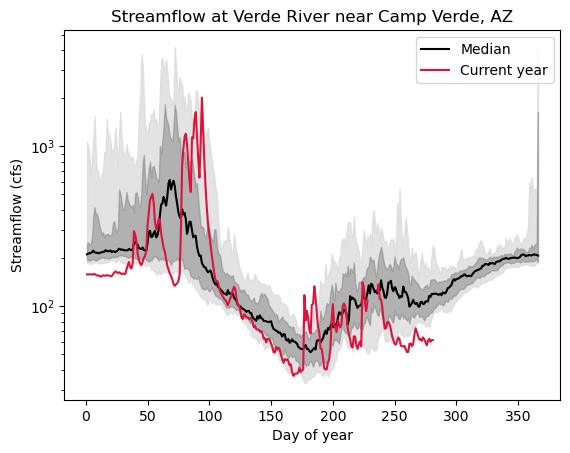

In [3]:
# Compute some statistics
df_doy = df.groupby(df.index.dayofyear).mean()
df_doy_q10 = df.groupby(df.index.dayofyear).quantile(0.10)
df_doy_q90 = df.groupby(df.index.dayofyear).quantile(0.90)
df_doy_q25 = df.groupby(df.index.dayofyear).quantile(0.25)
df_doy_q75 = df.groupby(df.index.dayofyear).quantile(0.75)
df_doy_q50 = df.groupby(df.index.dayofyear).quantile(0.50)
df_current_year = df.loc['01-01-2024':'10-14-2024']

# shade between 10th and 90th quantiles, and 25th and 75th quantiles
plt.fill_between(df_doy_q10.index, df_doy_q10['streamflow'], df_doy_q90['streamflow'], color='gainsboro', alpha=0.8)
plt.fill_between(df_doy_q25.index, df_doy_q25['streamflow'], df_doy_q75['streamflow'], color='gray', alpha=0.5)

# Plot the median
plt.plot(df_doy_q50.index, df_doy_q50['streamflow'], color='black', label='Median')
# Plot the current year
plt.plot(df_current_year.index.dayofyear, df_current_year['streamflow'], color='crimson', label='Current year')
plt.xlabel('Day of year')
plt.ylabel('Streamflow (cfs)')
plt.legend()

plt.semilogy()
plt.title('Streamflow at Verde River near Camp Verde, AZ')

In [93]:
current_week_historic_yday = df.loc['2001-10-07':'2001-10-14']['yday']
fc_1_yday = df.loc['2001-10-14':'2001-10-21']['yday']
fc_2_yday = df.loc['2001-10-21':'2001-10-28']['yday']

cw_doy = df_doy.loc[current_week_historic_yday]
fc_1_doy = df_doy.loc[fc_1_yday]
fc_2_doy = df_doy.loc[fc_2_yday]

current_week_historic = cw_doy['streamflow'].mean()
fc_1_historic = fc_1_doy['streamflow'].mean()
fc_2_historic = fc_2_doy['streamflow'].mean()

In [94]:
print(
    f'Based on the historic data for the Verde River, the mean streamflow \n' 
    f'for the first week of the forecast period is {fc_1_historic:.2f} cfs, \n' 
    f'and the mean streamflow for the second week of the forecast period is {fc_2_historic:.2f} cfs.\n'
    f'Historically, the mean streamflow for the current week is {current_week_historic:.2f} cfs.'
)

Based on the historic data for the Verde River, the mean streamflow 
for the first week of the forecast period is 128.64 cfs, 
and the mean streamflow for the second week of the forecast period is 147.18 cfs.
Historically, the mean streamflow for the current week is 140.81 cfs.


In [123]:
start, end = current_week_historic_yday.min(), current_week_historic_yday.max()
current_week_mask = (df['yday'] < end) & (df['yday'] > start)

start, end = fc_1_yday.min(), fc_1_yday.max()
fc_1_mask = (df['yday'] < end) & (df['yday'] > start)

start, end = fc_2_yday.min(), fc_2_yday.max()
fc_2_mask = (df['yday'] < end) & (df['yday'] > start)

In [127]:
# Get all October 7 - 14 data, October 14 - 21 data, and October 21 - 28 data
current_week_data = df.loc[current_week_mask]
fc_1_data = df.loc[fc_1_mask]
fc_2_data = df.loc[fc_2_mask]

# Now calculate the annual means
current_week_data = current_week_data.groupby(current_week_data.index.year).mean()
fc_1_data = fc_1_data.groupby(fc_1_data.index.year).mean()
fc_2_data = fc_2_data.groupby(fc_2_data.index.year).mean()

[]

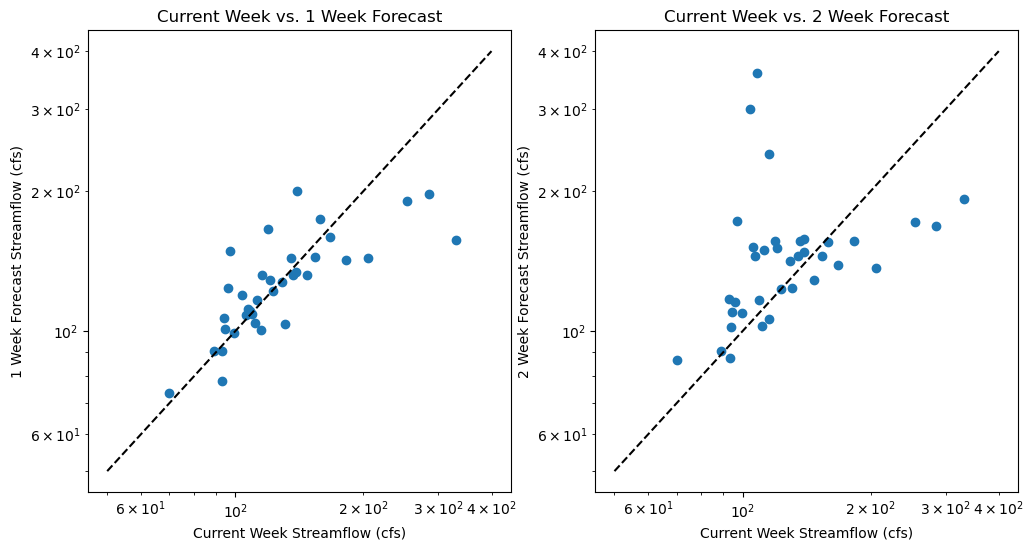

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(current_week_data['streamflow'], fc_1_data['streamflow'], label='1 Week Forecast')
axes[0].set_title('Current Week vs. 1 Week Forecast')
axes[0].set_xlabel('Current Week Streamflow (cfs)')
axes[0].set_ylabel('1 Week Forecast Streamflow (cfs)')
axes[0].plot([50, 400], [50, 400], color='black', linestyle='--')
axes[0].loglog()

axes[1].scatter(current_week_data['streamflow'], fc_2_data['streamflow'], label='2 Week Forecast')
axes[1].set_title('Current Week vs. 2 Week Forecast')
axes[1].set_xlabel('Current Week Streamflow (cfs)')
axes[1].set_ylabel('2 Week Forecast Streamflow (cfs)')
axes[1].plot([50, 400], [50, 400], color='black', linestyle='--')
axes[1].loglog()


In [140]:
print(
    f'The most recent week of recorded streamflow was {df_weekly["streamflow"].iloc[-1]} cfs.'
)

The most recent week of recorded streamflow was 60.21666666666667 cfs.


# Forecast & Report
I am predicting streamflow values of:
- October 14-21, 2024: 65 CFS
- October 21-28, 2024: 70 CFS

I am basing my predictions off of a persistence model. The persistence model is based off of simply carrying forward the current amount of streamflow. This is a simple model that assumes that the current flow will be the same in the future. I made some small modifications to simply carrying forward the streamflow by adding a little bit of flow to the current flow. This is because the current flow is quite low and it is likely that the flow will increase in the future, given the historic seasonality. This can be seen in the first figure, where I plot the historic median streamflow for every day of year (along with the interquartile range and 10/90th percentiles). Plotting the current year on top of this we see that overall the flow in the current year is quite low, but has held consistent for the past few weeks. Given this, I believe that the flow will increase in the future, but not by much. This is why I added a small amount of flow to the current flow to make my predictions.

Overall, I believe this will be reasonably close to the actual values, given the historic ability of the persistence model to predict streamflow values for this period of time. This can be seen in my second figure, where on the left subplot I show the persistence model's ability to predict streamflow values for the next week. The right subplot shows the persistence model's ability to predict streamflow values for the next two weeks. These scatter plots generally line up on the 1:1 line, but with some devations in both under and over-predicting. Without resorting to more advanced statistical analysis, I believe that the persistence model is a reasonable approach to predicting streamflow values for the next week. However, the current year is much lower than historic values, so it may be dangerous to assume past performance will predict future results. That said, being restricted to simple methodologies like a persistence model, it is the best guess I can make.